In [1]:
import pandas as pd

In [2]:
protests = pd.read_csv("protest_data.csv")

In [4]:
protests.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

In [5]:
protests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17145 non-null  int64  
 1   country                17145 non-null  object 
 2   ccode                  17145 non-null  int64  
 3   year                   17145 non-null  int64  
 4   region                 17145 non-null  object 
 5   protest                17145 non-null  int64  
 6   protestnumber          17145 non-null  int64  
 7   startday               15239 non-null  float64
 8   startmonth             15239 non-null  float64
 9   startyear              15239 non-null  float64
 10  endday                 15239 non-null  float64
 11  endmonth               15239 non-null  float64
 12  endyear                15239 non-null  float64
 13  protesterviolence      15758 non-null  float64
 14  location               15218 non-null  object 
 15  pa

In [8]:
Q2 = protests.country.value_counts().copy()
Q2

country
United Kingdom           578
France                   547
Ireland                  438
Germany                  364
Kenya                    353
                        ... 
Germany East              11
South Sudan               10
Czechoslovakia             6
Serbia and Montenegro      5
Germany West               2
Name: count, Length: 166, dtype: int64

In [10]:
Q2top = Q2.nlargest(5)
Q2top

country
United Kingdom    578
France            547
Ireland           438
Germany           364
Kenya             353
Name: count, dtype: int64

In [11]:
Q2bot = Q2.nsmallest(5)
Q2bot

country
Germany West              2
Serbia and Montenegro     5
Czechoslovakia            6
South Sudan              10
Germany East             11
Name: count, dtype: int64

In [12]:
%who

Q2	 Q2bot	 Q2top	 pd	 protests	 


In [15]:
import matplotlib.pyplot as plt

# Below is a special function that allows matplotlib, seaborn and other visualization libraries to display in Jupyter Notebooks
%matplotlib inline 

Text(0, 0.5, 'Total protests')

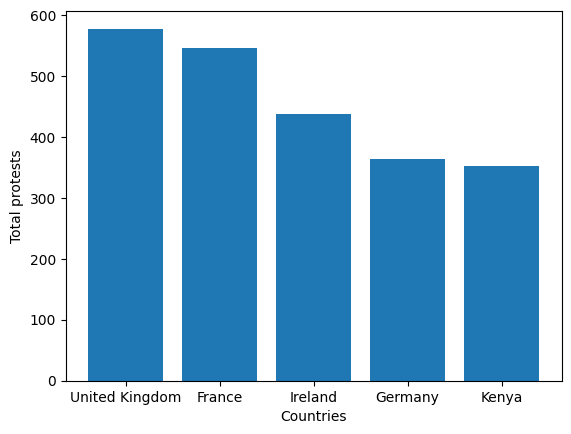

In [19]:
plt.bar(Q2top.index, height=Q2top.values)
plt.xlabel("Countries")
plt.ylabel("Total protests")

Text(0, 0.5, 'Total protests')

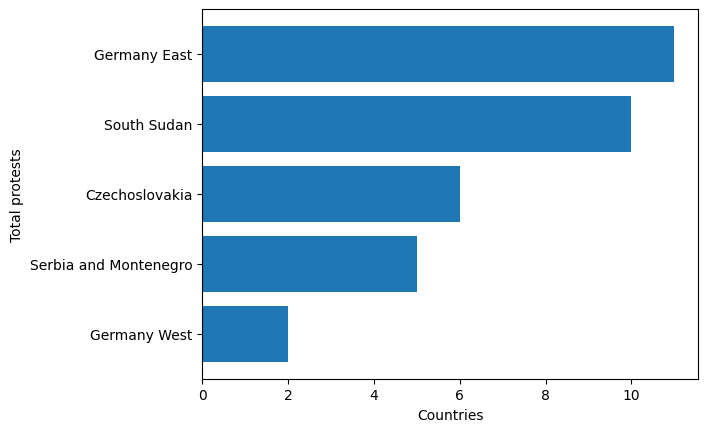

In [22]:
plt.barh(y=Q2bot.index, width=Q2bot.values)
plt.xlabel("Countries")
plt.ylabel("Total protests")

In [25]:
Q3 = protests[["region", 
               "startyear", "startmonth", "startday", 
               "endyear", "endmonth", "endday", 
               "participants"]].copy()
Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        17145 non-null  object 
 1   startyear     15239 non-null  float64
 2   startmonth    15239 non-null  float64
 3   startday      15239 non-null  float64
 4   endyear       15239 non-null  float64
 5   endmonth      15239 non-null  float64
 6   endday        15239 non-null  float64
 7   participants  15746 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.0+ MB


In [26]:
Q3["participants"]

0            1000s
1             1000
2              500
3             100s
4              950
           ...    
17140          50+
17141    About 100
17142          NaN
17143          NaN
17144          NaN
Name: participants, Length: 17145, dtype: object

In [27]:
Q3["participants"] = Q3["participants"].str.extract("(\d+)")
Q3["participants"]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\agung\AppData\Local\Temp\ipykernel_24564\2100347089.py:1: SyntaxWarning: invalid escape sequence '\d'
  Q3["participants"] = Q3["participants"].str.extract("(\d+)")


0        1000
1        1000
2         500
3         100
4         950
         ... 
17140      50
17141     100
17142     NaN
17143     NaN
17144     NaN
Name: participants, Length: 17145, dtype: object

In [28]:
# remove any rows with missing information
Q3 = Q3.dropna()

# change the participants column to an integer
Q3["participants"] = Q3["participants"].astype("int64")

Q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13988 entries, 0 to 17141
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        13988 non-null  object 
 1   startyear     13988 non-null  float64
 2   startmonth    13988 non-null  float64
 3   startday      13988 non-null  float64
 4   endyear       13988 non-null  float64
 5   endmonth      13988 non-null  float64
 6   endday        13988 non-null  float64
 7   participants  13988 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 983.5+ KB


In [29]:
# create dictionaries that combine the year, month and day columns
startdict = dict(year = Q3["startyear"], month = Q3["startmonth"], day = Q3["startday"])
enddict = dict(year = Q3["endyear"], month = Q3["endmonth"], day = Q3["endday"])

# create columns for start and end dates
Q3["startdate"] = pd.to_datetime(startdict)
Q3["enddate"] = pd.to_datetime(enddict)

# preview the new columns
Q3[["startdate", "enddate"]].head()

,startdate,enddate
0,1990-01-15,1990-01-15
1,1990-06-25,1990-06-25
2,1990-07-01,1990-07-01
3,1990-07-12,1990-09-06
4,1990-08-14,1990-08-15


In [30]:
# subtract the start date from end date and store the results in a new column
Q3["protestlength"] = Q3["enddate"] - Q3["startdate"]

# show protest length in number of days; add 1 to include the first day on which the protest occurred
Q3["protestlength"] = Q3["protestlength"].dt.days + 1

Q3.head()

,region,startyear,startmonth,startday,endyear,endmonth,endday,participants,startdate,enddate,protestlength
0,North America,1990.0,1.0,15.0,1990.0,1.0,15.0,1000,1990-01-15,1990-01-15,1
1,North America,1990.0,6.0,25.0,1990.0,6.0,25.0,1000,1990-06-25,1990-06-25,1
2,North America,1990.0,7.0,1.0,1990.0,7.0,1.0,500,1990-07-01,1990-07-01,1
3,North America,1990.0,7.0,12.0,1990.0,9.0,6.0,100,1990-07-12,1990-09-06,57
4,North America,1990.0,8.0,14.0,1990.0,8.0,15.0,950,1990-08-14,1990-08-15,2


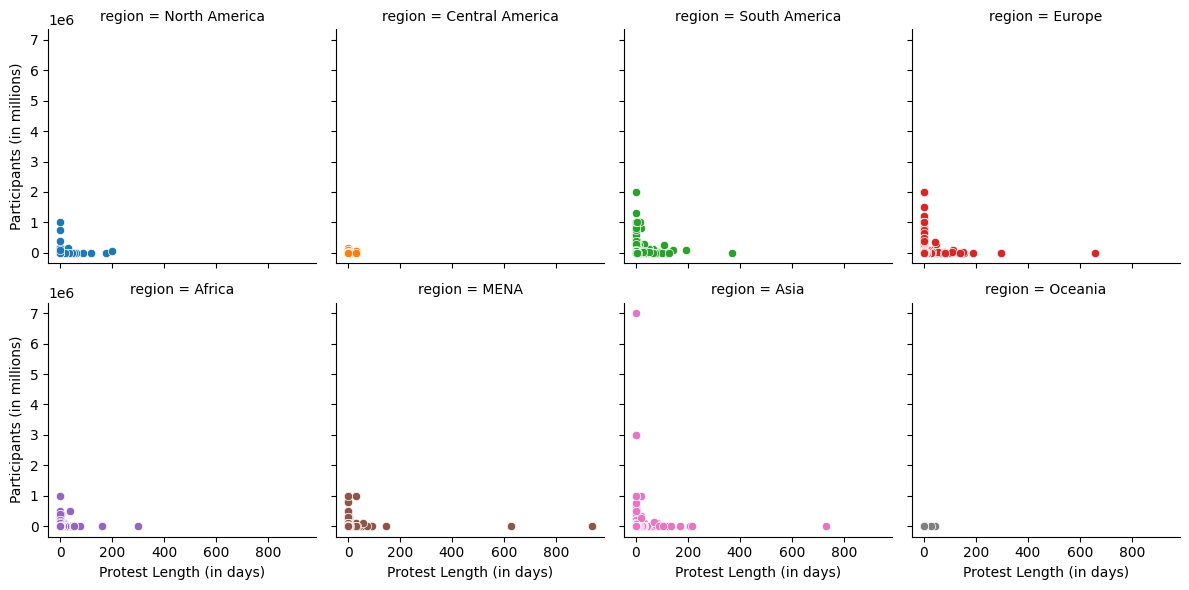

In [32]:
import seaborn as sns

# create a "grid" object using the FacetGrid function. 
grid = sns.FacetGrid(data = Q3, col = "region", col_wrap = 4, hue = "region")

# specify which chart we want to use on the grid and supply the variables for the x and y axis.
fig = grid.map_dataframe(sns.scatterplot, x = "protestlength", y = "participants")

# change the labels for our axes
fig.set_axis_labels("Protest Length (in days)", "Participants (in millions)")

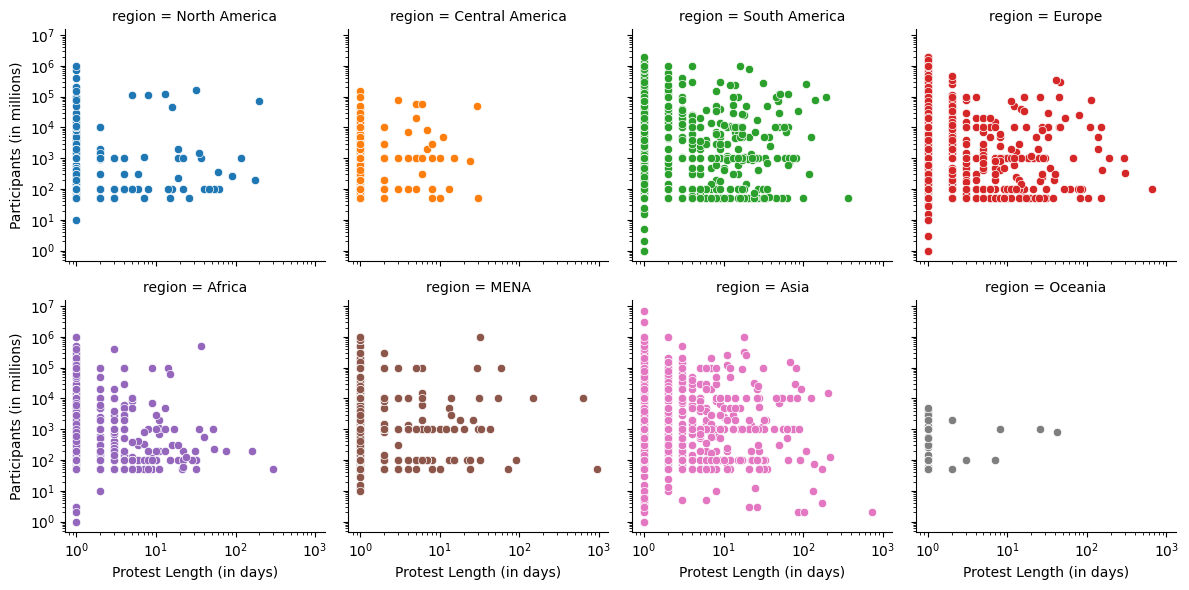

In [33]:
# create the grid object
grid = sns.FacetGrid(data = Q3, col = "region", col_wrap = 4, hue = "region")

# set both scales to logarithmic
grid.set(xscale="log", yscale="log")

# specify the chart to show on the grid
fig = grid.map_dataframe(sns.scatterplot, x = "protestlength", y = "participants")
fig.set_axis_labels("Protest Length (in days)", "Participants (in millions)")

In [40]:
# select the columns we need
Q4 = protests[["id", "country"]].copy()

# create a date column from the "startdict" object we used in Question 3
Q4["date"] = pd.to_datetime(startdict)

# get only year-month dates for a smoother line
Q4["date"] = Q4["date"].dt.to_period('M')

# to get the total number of protests per month, we'll need to group by date
Q4_group = Q4.groupby("date")

Q4.head()

,id,country,date
0,201990001,Canada,1990-01
1,201990002,Canada,1990-06
2,201990003,Canada,1990-07
3,201990004,Canada,1990-07
4,201990005,Canada,1990-08


In [42]:
# load bokeh modules
from bokeh.models import *
from bokeh.application import *
from bokeh.application.handlers import *
from bokeh.layouts import *
from bokeh.io import *
from bokeh.plotting import *

# set up bokeh for working in jupyter notebooks - this uses similar functionality to %matplotlib inline
output_notebook()

# create a source object from our pandas dataframe
pdata = ColumnDataSource(Q4_group)

# set up the size of our plot and format the x axis for dates
p = figure(height = 300, width = 600, x_axis_type = "datetime")

# add a line to our plot
# we can use "id_count" to get a count of the protests for each month
p.line(source = pdata, x = "date", y = "id_count", width = 2)

# push the plot to jupyter notebooks
handler = show(p, notebook_handle = True)
push_notebook(handle = handler)

Loading BokehJS ...

In [46]:
# create a list of countries for our drop-down menu
menu_list = Q4["country"].unique().tolist()

# sort the list alphabetically
menu_list.sort()

# preview the first 10 items on the list
menu_list[0:10]

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh']

In [ ]:
# create a new dataframe for when the default country, Afghanistan, is shown
default = Q4[Q4["country"] == "Afghanistan"].groupby("date")
p2data = ColumnDataSource(default)

# set up the size of our plot and format the x axis for dates
p2 = figure(height = 300, width = 600, x_axis_type = "datetime")

# add a line to our plot
p2.line(source = p2data, x = "date", y = "id_count", width = 2)

# create the dropdown menu with a list of all countries in our dataframe
menu = Select(title = "Select country", value = "Afghanistan", options = menu_list)

# define what happens when a new country is selected
def update_plot(attr, old, new):
    new_data = Q4[Q4["country"] == menu.value].groupby("date")
    p2data.data = new_data

# update the plot when a new country is selected
menu.on_change("value", update_plot)

# set up a layout for our menu and plot
lo = layout([[menu], [p2]])

# add the layout to the notebook
def modify_doc(doc):
    doc.add_root(lo)

# show the application in the notebook
handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app, notebook_handle = True)

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'vscode-webview://0pu9mpf11m8bh1fma06otp7et37suo4s3sj5cpdltr6cm6bqbiu6';                       use --allow-websocket-origin=0pu9mpf11m8bh1fma06otp7et37suo4s3sj5cpdltr6cm6bqbiu6 or set BOKEH_ALLOW_WS_ORIGIN=0pu9mpf11m8bh1fma06otp7et37suo4s3sj5cpdltr6cm6bqbiu6 to permit this; currently we allow origins {'localhost:8888'}


In [49]:
import os #functions for working with your operating system
import shutil #extra